In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import copy
from sklearn.cluster import MeanShift, estimate_bandwidth

In [2]:
address = ""
img_file = address+'images/example.png'
img_row_size = 67
img_col_size = 48
img_size = img_row_size*img_col_size

Number of estimated clusters: 3
Cluster centers:
 [[26.4        30.67906977]
 [ 1.91208791 15.38461538]
 [ 5.         42.5       ]]


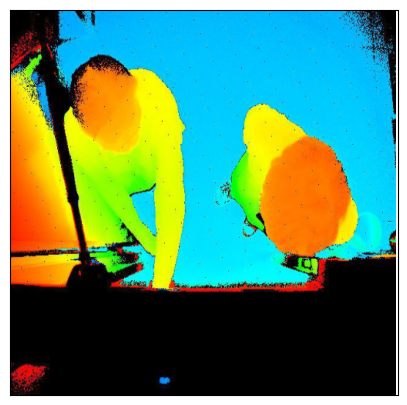

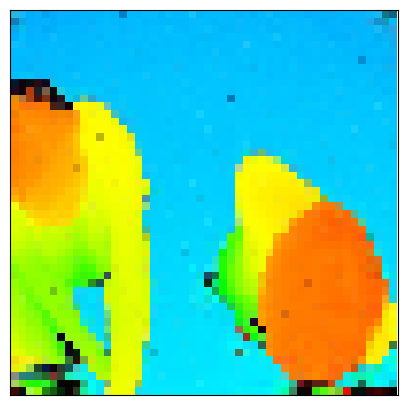

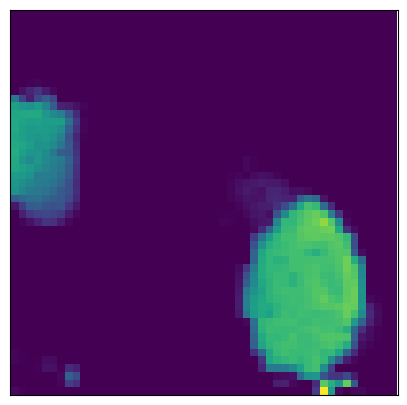

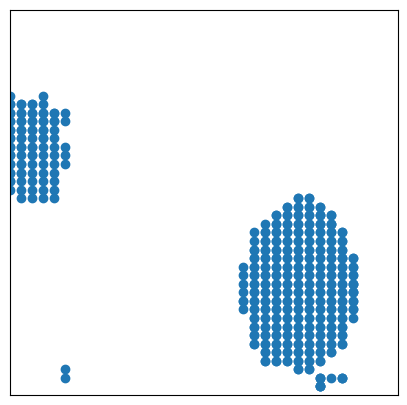

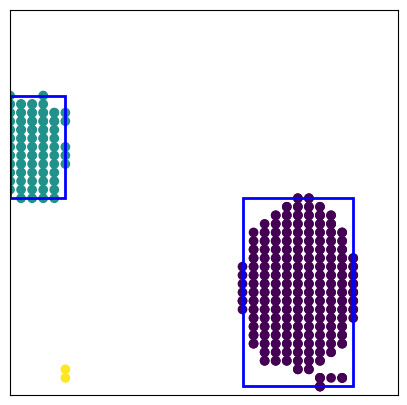

[]

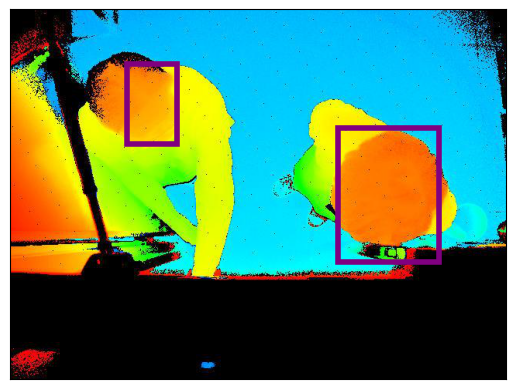

In [3]:
img_color = cv.imread(img_file, cv.IMREAD_COLOR)
img_color = cv.resize(cv.cvtColor(img_color, cv.COLOR_BGR2RGB), (img_col_size, img_row_size))[0:45,10:45,:]
R = img_color[:, :, 0].astype(int)
G = img_color[:, :, 1].astype(int)
B = img_color[:, :, 2].astype(int)
weighted_image = 1.0 * R - 1.0 * G - 1.0 * B
weighted_image[weighted_image < 0] = 0

img_data = weighted_image
#img_gray = cv.imread(img_file, cv.IMREAD_GRAYSCALE)
#img_data = cv.resize(img_gray, (img_col_size, img_row_size))[0:40,15:40]


process1 = plt.figure(figsize=(5, 5))
img_process1 = cv.resize(cv.cvtColor(cv.imread(img_file, cv.IMREAD_COLOR), cv.COLOR_BGR2RGB), (500,500))
plt.imshow(img_process1)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.axis('equal')

# process2 = plt.figure(figsize=(5, 5))
# img_process2 = cv.resize(cv.cvtColor(cv.imread(img_file, cv.IMREAD_COLOR), cv.COLOR_BGR2RGB), (50, 50))
# plt.imshow(img_process2)
# plt.gca().set_xticks([])
# plt.gca().set_yticks([])
# plt.axis('equal')

process2 = plt.figure(figsize=(5, 5))
img_process2 = cv.resize(img_process1[0:330,100:450,:], (50, 50))
plt.imshow(img_process2)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.axis('equal')

process3 = plt.figure(figsize=(5, 5))
img_process3 = cv.resize(img_data, (50, 50))
plt.imshow(img_process3)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.axis('equal')


X = []
for i in range(len(img_data)):
    for j in range(len(img_data[0])):
        for k in range(int((img_data[i][j])/50)):
            X += [[j,i]]

if len(X)==0:
    X += [[0.001,0.001]]
X = np.array(X)

process4 = plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.xlim([0,35])
plt.ylim([0,45])
plt.gca().invert_yaxis()
plt.gca().set_xticks([])
plt.gca().set_yticks([])


# bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))
bandwidth = 6

# Performing MeanShift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

# Finding the Cluster Centers
cluster_centers = ms.cluster_centers_
labels = ms.labels_

# Normal Cluster Probability
cluster_probabilities = []
total_data_points = len(X)
for label in np.unique(labels):
    cluster_points = X[labels == label]
    num_points = len(cluster_points)
    probability = num_points / total_data_points
    cluster_probabilities.append(probability)
cluster_probabilities = np.array(cluster_probabilities)/np.max(cluster_probabilities)

# Finding the Number of Clusters
n_clusters_ = len(np.unique(labels))

# Print Cluster Centers
print(f"Number of estimated clusters: {n_clusters_}")
print("Cluster centers:\n", cluster_centers)

# Visualization
process5 = plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
#plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=200, label='Centers')

# Bounding Boxes
bounding_boxes = []
for i, label in enumerate(np.unique(labels)):
    cluster_points = X[labels == label]
    min_x, min_y = cluster_points.min(axis=0)
    max_x, max_y = cluster_points.max(axis=0)
    bounding_box = [np.round(min_x,2), np.round(min_y,2), np.round(max_x,2), np.round(max_y,2), np.round(cluster_probabilities[label],2)]
    bounding_boxes.append(bounding_box)
    if cluster_probabilities[i]>=0.15 and len(cluster_points)>10:
        rect = plt.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, fill=False, edgecolor='blue', linewidth=2)
        plt.gca().add_patch(rect)

# Graph Settings
plt.xlim([0,35])
plt.ylim([0,45])
plt.gca().invert_yaxis()
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.show()


result_ms = plt.figure()
plt.imshow(cv.cvtColor(cv.imread(img_file, cv.IMREAD_COLOR), cv.COLOR_BGR2RGB), aspect='auto')
bounding_boxes = []
for i, label in enumerate(np.unique(labels)):
    cluster_points = X[labels == label]
    min_x, min_y = cluster_points.min(axis=0)
    max_x, max_y = cluster_points.max(axis=0)
    min_x, min_y = 13*min_x+150, 7*min_y
    max_x, max_y = 13*max_x+150, 7*max_y+20
    bounding_box = [np.round(min_x,2), np.round(min_y,2), np.round(max_x,2), np.round(max_y,2), np.round(cluster_probabilities[label],2)]
    bounding_boxes.append(bounding_box)
    if cluster_probabilities[i]>=0.15 and len(cluster_points)>10:
        rect = plt.Rectangle((min_x, min_y), max_x - min_x, max_y - min_y, fill=False, edgecolor='purple', linewidth=4)
        plt.gca().add_patch(rect)
plt.gca().set_xticks([])
plt.gca().set_yticks([])

# %time my_list = [i**2 for i in range(10000)]


image 1/1 C:\Users\user\Python Scripts\ToF\images\example.png: 480x640 2 oranges, 96.3ms
Speed: 1.0ms preprocess, 96.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


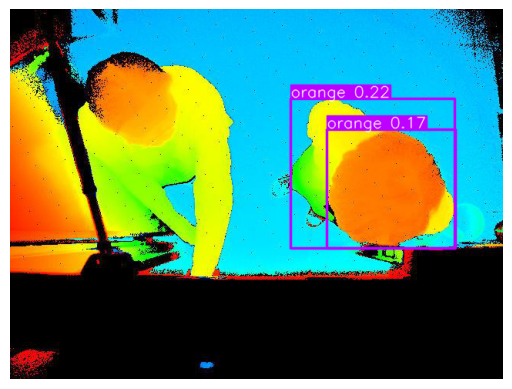

In [4]:
from ultralytics import YOLO

# Load YOLOv5 model
model = YOLO('yolov5su.pt')  # Use a pretrained YOLOv5 model

# Perform object detection with lowered confidence threshold
results = model(img_file, conf=0.1)

# Check if any detections are made
if len(results) > 0 and len(results[0].boxes) > 0:
    # Get the processed image with bounding boxes
    result_image = results[0].plot()  # Access the first result and plot it
else:
    # If no detections, load the original image
    print("No detections made. Displaying the original image.")
    result_image = cv.imread(image_path)

# Ensure the image is valid
if result_image is None:
    print("Error: Unable to load image for display.")

# If using YOLO output, convert colors to match original (RGB to BGR for Matplotlib compatibility)
if len(results) > 0 and len(results[0].boxes) > 0:
    result_image = cv.cvtColor(result_image, cv.COLOR_BGR2RGB)

# Display the result image using matplotlib
result_yolo = plt.figure()
plt.imshow(result_image)
plt.axis('off')  # Hide axes
plt.show()

# %time my_list = [i**2 for i in range(10000)]